Stock Market Prediction and Forcasting using stacked LSTM
Name: Aryan Chaple
LetsGrowMore VIP(JULY22)

In [4]:
#import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb
import csv
import warnings
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

data_set = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data_set

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [6]:
#READING THE DATASET
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [12]:
#describing the data
data_set.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [13]:
data_set.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [16]:
data_set.reset_index(drop=True, inplace=True)
data_set.fillna(data_set.mean(), inplace=True)
data_set.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2660\1377785936.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_set.fillna(data_set.mean(), inplace=True)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [18]:
data_set.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [19]:
data_set.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [20]:
data_set.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


<AxesSubplot:>

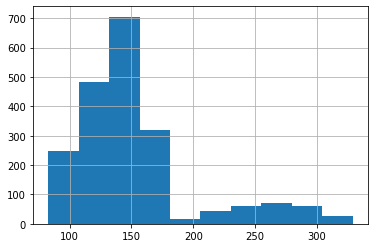

In [31]:
data_set['High'].hist()

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

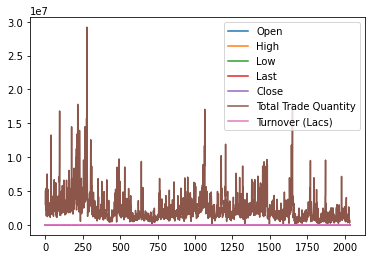

In [26]:
plt.figure(figsize=(10,6))
data_set.plot()

In [27]:
data_set= data_set.iloc[:, 0:5]
data_set

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [28]:
dataset

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [25]:
data=data_set.filter(['Close'])
dataset = data_set.values
training_data_len=math.ceil(len(data_set)*5)
training_data_len

10175

In [29]:
training_set = data_set.iloc[:,1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [33]:
#LSTM OPERATIONS
scaler = MinMaxScaler(feature_range = (0, 1))

data_training_scaled = scaler.fit_transform(training_set)

features_set = []
labels = []
for i in range(60, 586):
    features_set.append(data_training_scaled[i-60:i, 0])
    labels.append(data_training_scaled[i, 0])
    
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

In [34]:
model = Sequential()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(features_set, labels, epochs = 25, batch_size = 20)

Epoch 1/25
27/27 [==============================] - 0s 885us/step - loss: 0.1276
Epoch 2/25
27/27 [==============================] - 0s 899us/step - loss: 0.1301
Epoch 3/25
27/27 [==============================] - 0s 906us/step - loss: 0.1279
Epoch 4/25
27/27 [==============================] - 0s 880us/step - loss: 0.1318
Epoch 5/25
27/27 [==============================] - 0s 764us/step - loss: 0.1284
Epoch 6/25
27/27 [==============================] - 0s 904us/step - loss: 0.1271
Epoch 7/25
27/27 [==============================] - 0s 690us/step - loss: 0.1269
Epoch 8/25
27/27 [==============================] - 0s 691us/step - loss: 0.1283
Epoch 9/25
27/27 [==============================] - 0s 690us/step - loss: 0.1279
Epoch 10/25
27/27 [==============================] - 0s 877us/step - loss: 0.1284
Epoch 11/25
27/27 [==============================] - 0s 806us/step - loss: 0.1272
Epoch 12/25
27/27 [==============================] - 0s 729us/step - loss: 0.1306
Epoch 13/25
27/27 [======

In [36]:
data_testing_complete = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [43]:
data_total = pd.concat((data_set['Open'], data_set['Open']), axis=0)
test_inputs = data_total[len(data_total) - len(data_set) - 60:].values
test_inputs.shape
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_features = []
for i in range(62, 81):
    test_features.append(test_inputs[i-60:i, 0])
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], -1))
test_features.shape


(19, 60, 1)

In [44]:
#PREDICTION OF DATA
outcome = model.predict(test_features)
outcome

1/1 [==============================] - 0s 17ms/step


array([[[0.21654502],
        [0.2175588 ],
        [0.19870235],
        ...,
        [0.16626115],
        [0.6202352 ],
        [0.6222628 ]],

       [[0.2175588 ],
        [0.19870235],
        [0.19018653],
        ...,
        [0.6202352 ],
        [0.6222628 ],
        [0.64436334]],

       [[0.19870235],
        [0.19018653],
        [0.17802109],
        ...,
        [0.6222628 ],
        [0.64436334],
        [0.6171938 ]],

       ...,

       [[0.16909976],
        [0.17396593],
        [0.17741281],
        ...,
        [0.57137066],
        [0.6370641 ],
        [0.6281427 ]],

       [[0.17396593],
        [0.17741281],
        [0.18268451],
        ...,
        [0.6370641 ],
        [0.6281427 ],
        [0.6321979 ]],

       [[0.17741281],
        [0.18268451],
        [0.19221412],
        ...,
        [0.6281427 ],
        [0.6321979 ],
        [0.6255069 ]]], dtype=float32)

In [46]:
x_train = data_set[0:1234]
y_train = data_set[1:1342]
print(x_train.shape)
print(y_train.shape)

(1234, 5)
(1341, 5)


In [47]:
x_train

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1229,2013-10-08,157.00,157.80,155.20,155.80
1230,2013-10-07,153.70,156.75,151.80,156.15
1231,2013-10-04,155.30,156.10,152.20,152.85
1232,2013-10-03,151.00,155.80,150.70,154.90


In [48]:
y_train

,Date,Open,High,Low,Last
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
5,2018-09-21,235.00,237.00,227.95,233.75
...,...,...,...,...,...
1337,2013-05-06,147.60,149.80,146.00,147.75
1338,2013-05-03,149.75,149.75,146.20,147.00
1339,2013-05-02,146.80,149.85,145.90,149.00
1340,2013-04-30,145.00,148.00,142.70,146.75


In [53]:
#NP.RANDOM AND NP.RANDN FUNCTION
np.random.seed(3)
np.random.randn(2, 4)

array([[ 1.78862847,  0.43650985,  0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898, -0.08274148, -0.62700068]])

In [50]:
#DRAW N NUMBERS FROM THE NORMAL DISTRIBUTION(1,2,3,4,...)
np.random.normal(2)

1.4990141387048277

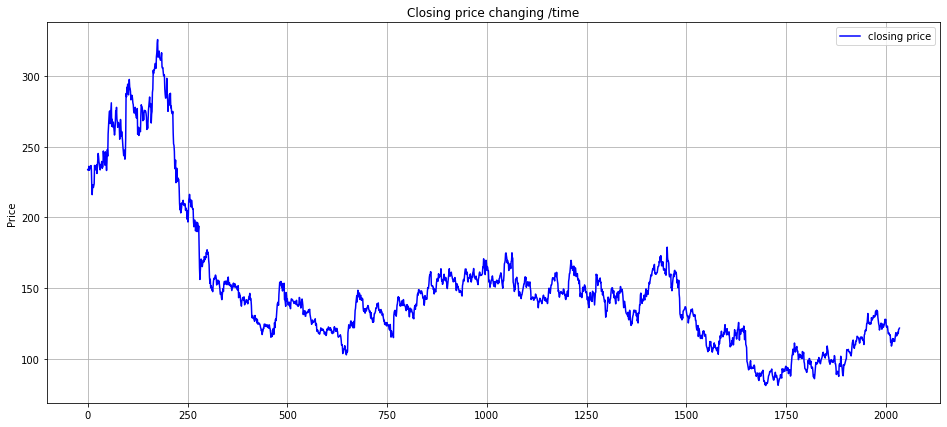

In [58]:
#LINECHARTS
plt.figure(figsize=(16,4))

data['Close'].plot(kind= 'line', figsize=(16,7), c='b', label='closing price')

plt.ylabel("Price")

plt.legend (loc= "upper right")
plt.title("Closing price changing /time")
plt.grid()

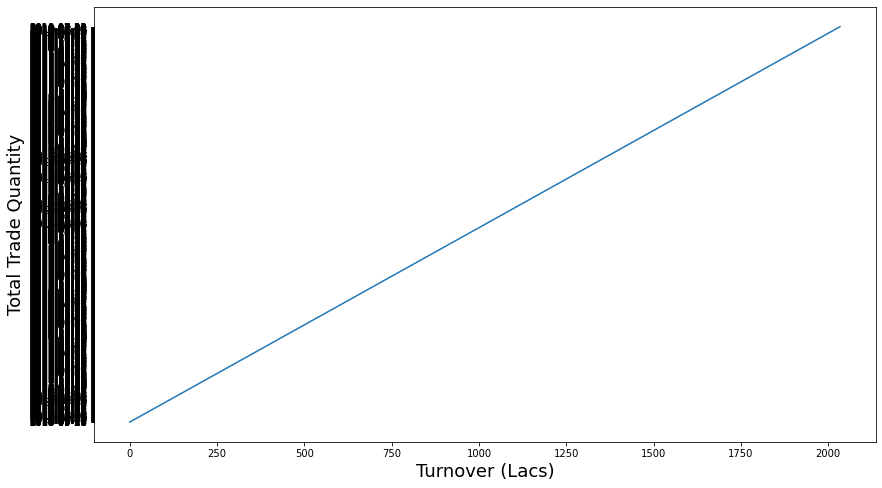

In [64]:
plt.figure(figsize=(14,8))
plt.plot(data_set['Date'])
plt.xlabel('Turnover (Lacs)',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()